<a href="https://colab.research.google.com/github/ethanmjansen/LS_DS10_BuildWeek/blob/master/BetterBuildWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LS_DS10_Unit1_Build

##Housekeeping  
- Imports  
- Creating DF  
- Filtering  



In [0]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from google.colab import files
import datetime
import seaborn as sns
from matplotlib import rc

In [2]:
!wget 'https://github.com/ethanmjansen/LS_DS10_BuildWeek/blob/master/who-suicide-statistics.zip?raw=true' -O who-suicide-statistics.zip

--2019-11-21 23:52:14--  https://github.com/ethanmjansen/LS_DS10_BuildWeek/blob/master/who-suicide-statistics.zip?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ethanmjansen/LS_DS10_BuildWeek/raw/master/who-suicide-statistics.zip [following]
--2019-11-21 23:52:15--  https://github.com/ethanmjansen/LS_DS10_BuildWeek/raw/master/who-suicide-statistics.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ethanmjansen/LS_DS10_BuildWeek/master/who-suicide-statistics.zip [following]
--2019-11-21 23:52:15--  https://raw.githubusercontent.com/ethanmjansen/LS_DS10_BuildWeek/master/who-suicide-statistics.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.g

In [3]:
!unzip who-suicide-statistics.zip

Archive:  who-suicide-statistics.zip
  inflating: who_suicide_statistics.csv  


In [0]:
#Creating the df
df = pd.read_csv('who_suicide_statistics.csv')

In [0]:
#Narrowing down to just 5 of the top ten GDP's
df = df[(df['country'] == 'United States of America') |
        (df['country'] == 'Japan') |
        (df['country'] == 'Germany') |
        (df['country'] == 'France') |
        (df['country'] == 'United Kingdom')|
        (df['country'] == 'South Korea')]
                              

In [0]:
#Narrowing down to a 15 year span around 2008
df = df[(df['year'] > 1999) & (df['year'] <= 2017)]

In [0]:
#This just makes it cleaner in my opinion
df.replace({'United States of America': 'USA'}, inplace=True)

##Feature Manipulation  
- Add a Meaningful Feature
- Clarify Proper Nouns

In [0]:
#Creating a suicide rate
df['suicide_rate'] = df['suicides_no'] / df['population']

In [0]:
#rate per 100,000 people
df['suicide_rate'] = df['suicide_rate'] * 100000

In [0]:
#Changing country to Country
df['Country'] = df['country']

In [11]:
#Inspection
df

,country,year,sex,age,suicides_no,population,suicide_rate,Country
14748,France,2000,female,15-24 years,137.0,3764091.0,3.639657,France
14749,France,2000,female,25-34 years,291.0,4188264.0,6.947986,France
14750,France,2000,female,35-54 years,1127.0,8501357.0,13.256707,France
14751,France,2000,female,5-14 years,8.0,3643220.0,0.219586,France
14752,France,2000,female,55-74 years,819.0,5646919.0,14.503484,France
...,...,...,...,...,...,...,...,...
42367,USA,2016,male,25-34 years,NaN,22511217.0,NaN,USA
42368,USA,2016,male,35-54 years,NaN,41481607.0,NaN,USA
42369,USA,2016,male,5-14 years,NaN,21313304.0,NaN,USA
42370,USA,2016,male,55-74 years,NaN,33121620.0,NaN,USA


##First Visualization  

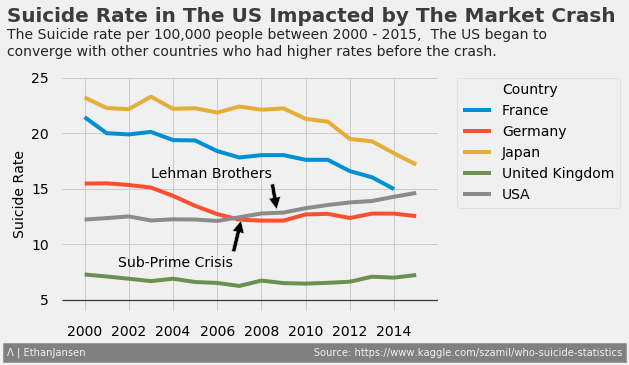

In [12]:
#Set Style
style.use('fivethirtyeight')
#Prototype
ax = sns.lineplot(x='year',
                  y='suicide_rate',
                  data=df,
                  hue='Country',
                  err_style=None)

# Adding a title and a subtitle
plt.text(x = 1996.5, y = 30, s = "Suicide Rate in The US Impacted by The Market Crash",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 1996.5, y = 27,
               s = 'The Suicide rate per 100,000 people between 2000 - 2015,  The US began to\nconverge with other countries who had higher rates before the crash.',
              fontsize = 14, alpha = .85)

#Annotations
ax.annotate('Lehman Brothers', xy=(2008.7, 13), xytext=(2003, 16),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Sub-Prime Crisis', xy=(2007.1, 12.3), xytext=(2001.5, 8),
            arrowprops=dict(facecolor='black', shrink=0.05))

#Remove Labels
plt.xlabel(None)
plt.ylabel('Suicide Rate', fontsize=14)

#Move Legend
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)

#Tick Range
plt.yticks(np.arange(5, 26, step=5))
plt.xticks(np.arange(2000, 2015, step=2))

#Bold the bottom line
plt.axhline(y =5 , color = 'black', linewidth = 1.3, alpha = .7)

#Signature
plt.text(x = 1996.5, y = 0,
    s = '\u039B | EthanJansen                                                                         Source: https://www.kaggle.com/szamil/who-suicide-statistics',fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

#Set Limits
plt.ylim(bottom = 4, top = 25)
plt.xlim(left = 1999, right = 2016)

#Offset
sns.despine(offset=10)

##Housekeeping  
- Creating a Second DF  
- Additional Filtering

In [0]:
#Making a new DF for a second visualization
df2 = pd.read_csv('who_suicide_statistics.csv')

In [0]:
#Narrowing down to just the United States
df2 = df2[(df2['country'] == 'United States of America')]

In [0]:
#Narrowing down to just the United States
df2 = df2[(df2['age'] == '15-24 years') | 
          (df2['age'] == '25-34 years') | 
          (df2['age'] == '35-54 years') |  
          (df2['age'] == '55-74 years') |  
          (df2['age'] == '75+ years') ]

In [0]:
#Narrowing down to a 15 year span around 2008
df2 = df2[(df2['year'] > 1999) & (df2['year'] <= 2015)]

In [0]:
#This just makes it cleaner in my opinion
df2.replace({'United States of America': 'USA'}, inplace=True)
df2.replace({'male': 'Male'}, inplace=True)
df2.replace({'female': 'Female'}, inplace=True)

##Feature Manipulation  
- Add a Meaningful Feature  
- Clarify Proper Nouns

In [0]:
#Creating a suicide rate
df2['suicide_rate'] = df2['suicides_no'] / df2['population']

In [0]:
#Rate per 100,000 people
df2['suicide_rate'] = df2['suicide_rate'] * 100000

In [20]:
#Inspection
df2

,country,year,sex,age,suicides_no,population,suicide_rate
42168,USA,2000,Female,15-24 years,570.0,19105073.0,2.983501
42169,USA,2000,Female,25-34 years,854.0,19771195.0,4.319415
42170,USA,2000,Female,35-54 years,2736.0,41881451.0,6.532725
42172,USA,2000,Female,55-74 years,1084.0,22717040.0,4.771748
42173,USA,2000,Female,75+ years,425.0,10494416.0,4.049773
...,...,...,...,...,...,...,...
42354,USA,2015,Male,15-24 years,4359.0,22615073.0,19.274755
42355,USA,2015,Male,25-34 years,5503.0,22137097.0,24.858725
42356,USA,2015,Male,35-54 years,11634.0,41658010.0,27.927402
42358,USA,2015,Male,55-74 years,9068.0,32264697.0,28.105021


##Second Visualization

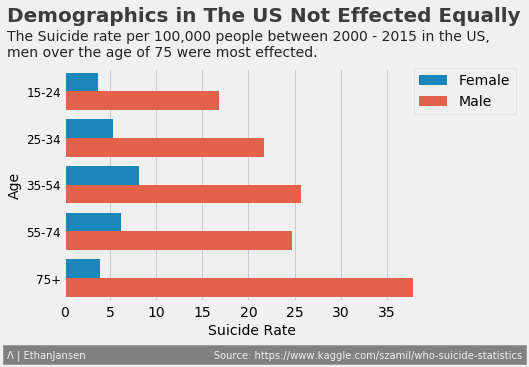

In [21]:
#Set Style
style.use('fivethirtyeight')

ax = sns.barplot(x="suicide_rate", y="age", hue="sex", orient='h', data=df2, errwidth=False)

# Adding a title and a subtitle
plt.text(x = -6.2, y = -1.5, s = "Demographics in The US Not Effected Equally",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -6.2, y = -0.75,
               s = 'The Suicide rate per 100,000 people between 2000 - 2015 in the US,\nmen over the age of 75 were most effected.',
              fontsize = 14, weight='normal', alpha = .85)

#Make ticks normal
ax.set_yticklabels(['15-24', '25-34', '35-54', '55-74', '75+'],
                   color = 'black',
                   fontsize = 12, weight='normal')
plt.xticks(np.arange(0, 40, step=5), fontsize= 14, weight='normal')

#Remove Labels
plt.xlabel('Suicide Rate', fontsize=14)
plt.ylabel('Age', fontsize=14)

#Invert yaxis
ax.invert_yaxis

#Signature
plt.text(x = -6.2, y = 5.7,
    s = '\u039B | EthanJansen                                         Source: https://www.kaggle.com/szamil/who-suicide-statistics',fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

legend_properties = {'weight':'normal'}

#Move Legend
plt.legend(prop=legend_properties, bbox_to_anchor=(.93, 1),
           loc='upper left', fontsize=14,
           borderaxespad=0.);
